In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


# import dataset
df = pd.read_csv('trainDataset.csv', index_col=False)

scaler = StandardScaler()

df = df.drop(['ID'], axis=1)
X = df.drop(['pCR (outcome)'], axis=1)
y = df['pCR (outcome)']

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [2]:
# K-fold cross validation
def Classkf(ag, X, y, name):
    n_folds = 5
    cv_error = np.average(cross_val_score(ag, X, y, cv=n_folds))
    print('The {}-fold cross-validation accuracy score for {} is {:.2f} '.format(n_folds, name, cv_error))

# plot
def Classplot(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
    plt.xlabel('Predicted Values', )
    plt.ylabel('Actual Values');


The 5-fold cross-validation accuracy score for SVM is 0.75 
The 5-fold cross-validation accuracy score for Decision Tree is 0.71 
The 5-fold cross-validation accuracy score for MLP is 0.66 


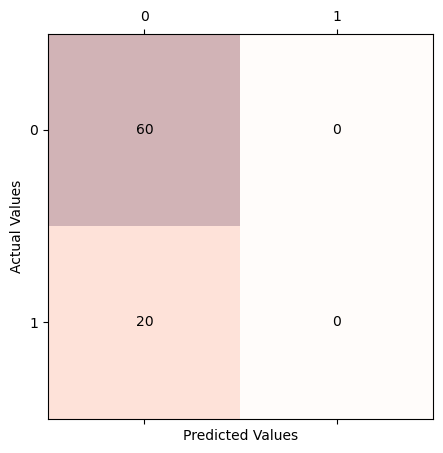

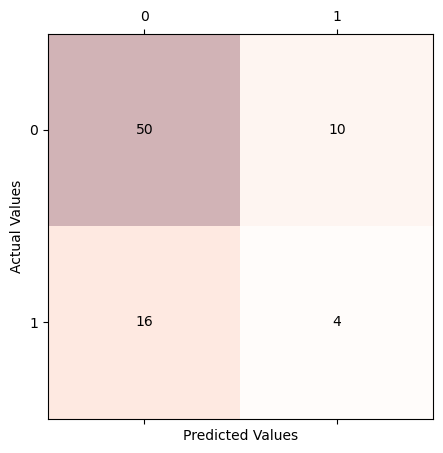

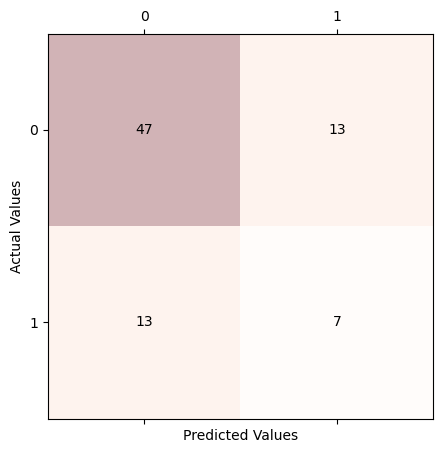

In [3]:
# SVM
clf = svm.SVC(C=1.0, kernel='rbf', degree=5, gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
name = 'SVM'
Classkf(clf, X, y, name)
Classplot(y_test, y_pred, name)


# Decision tree
dt = DecisionTreeClassifier(max_features= 10,
                           max_leaf_nodes= 5,
                           random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
name = 'Decision Tree'
Classkf(dt, X, y, name)
Classplot(y_test, y_pred, name)

#MLP

mlp = MLPClassifier(hidden_layer_sizes=(6, 4), solver='lbfgs', random_state=42, max_iter=50000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
name = 'MLP'
Classkf(mlp, X, y, name)
Classplot(y_test, y_pred, name)

In [4]:
import csv

f = open('PCR.csv', 'w')

writer = csv.writer(f)

output = np.arange(len(y_pred)*2).reshape(len(y_pred),2)
i = 0
while i < len(y_pred):
    output[i][0] = i
    output[i][1] = y_pred[i]
    i = i+1

writer.writerows(output)
# close the file
f.close()